In [1]:
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
winetr = pd.read_csv("wine_train.csv")
winete = pd.read_csv("wine_test.csv")

In [3]:
winetr.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,2288,6.7,0.17,0.37,2.00,0.039,34.0,125.0,0.99220,3.26,0.60,10.8,7
1,1136,10.4,0.52,0.45,2.00,0.080,6.0,13.0,0.99774,3.22,0.76,11.4,6
2,4883,8.0,0.34,0.25,6.40,0.035,38.0,103.0,0.99148,2.91,0.23,12.2,6
3,3166,7.5,0.19,0.49,1.80,0.055,19.0,110.0,0.99460,3.33,0.44,9.9,5
4,2230,7.0,0.23,0.42,18.05,0.050,35.0,144.0,0.99990,3.22,0.42,8.8,5


In [4]:
print("Keys of wine data set:\n", winetr.keys())

Keys of wine data set:
 Index(['Unnamed: 0', 'fixed.acidity', 'volatile.acidity', 'citric.acid',
       'residual.sugar', 'chlorides', 'free.sulfur.dioxide',
       'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')


In [22]:
print("Shape of data:", winetr['Unnamed: 0'].shape)
print("Shape of data:", winete['Unnamed: 0'].shape)

Shape of data: (4872,)
Shape of data: (1625,)


In [6]:
split_at = 12
X_train = winetr.iloc[:, 1:split_at]
Y_train = winetr.iloc[:, split_at:]
X_test = winete.iloc[:, 1:split_at]
Y_test = winete.iloc[:, split_at:]

In [7]:
X_train.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
0,6.7,0.17,0.37,2.00,0.039,34.0,125.0,0.99220,3.26,0.60,10.8
1,10.4,0.52,0.45,2.00,0.080,6.0,13.0,0.99774,3.22,0.76,11.4
2,8.0,0.34,0.25,6.40,0.035,38.0,103.0,0.99148,2.91,0.23,12.2
3,7.5,0.19,0.49,1.80,0.055,19.0,110.0,0.99460,3.33,0.44,9.9
4,7.0,0.23,0.42,18.05,0.050,35.0,144.0,0.99990,3.22,0.42,8.8


In [8]:
Y_test.head()

,quality
0,6
1,5
2,6
3,4
4,5


In [9]:
reg1=KNeighborsRegressor(n_neighbors=1)
reg1.fit(X_train,Y_train)
print("Test set R^2:{:.4f}".format(reg1.score(X_test,Y_test)))

Test set R^2:-0.0688


In [10]:
k_range=range(1,21)
r2trains = [] #to store R^2 values for different k
r2tests = [] #to store R^2 values for different k
for K in k_range:
    model = KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, Y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    r2train = model.score(X_train,Y_train)
    r2test = model.score(X_test,Y_test)
    r2trains.append(r2train)
    r2tests.append(r2test)
    print('Training R^2 value for k = ' , K , 'is:', r2train)
    print('Testing R^2 value for k = ' , K , 'is:', r2test)

Training R^2 value for k =  1 is: 1.0
Testing R^2 value for k =  1 is: -0.06883368809875723
Training R^2 value for k =  2 is: 0.7280689690887908
Testing R^2 value for k =  2 is: 0.0680147752781256
Training R^2 value for k =  3 is: 0.5754420669840697
Testing R^2 value for k =  3 is: 0.12044713672520735
Training R^2 value for k =  4 is: 0.49731800565514683
Testing R^2 value for k =  4 is: 0.15787073470806157
Training R^2 value for k =  5 is: 0.4410102893169032
Testing R^2 value for k =  5 is: 0.17183085094334705
Training R^2 value for k =  6 is: 0.397806110434331
Testing R^2 value for k =  6 is: 0.17495494581290227
Training R^2 value for k =  7 is: 0.3718974474990112
Testing R^2 value for k =  7 is: 0.18446276985932253
Training R^2 value for k =  8 is: 0.34996686354637785
Testing R^2 value for k =  8 is: 0.18752369287332904
Training R^2 value for k =  9 is: 0.32603720735159225
Testing R^2 value for k =  9 is: 0.1970954814035889
Training R^2 value for k =  10 is: 0.30817215046149093
Testi

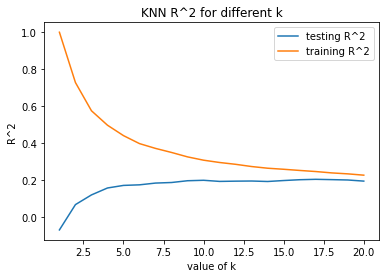

In [11]:
#plotting the R^2 values against k values

plt.plot(k_range, r2tests, label="testing R^2")
plt.plot(k_range, r2trains, label="training R^2")
plt.title("KNN R^2 for different k")
plt.xlabel("value of k")
plt.ylabel("R^2")
plt.legend();

In [24]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression().fit(X_train, Y_train)
print("lr.coef_:{}".format(lr.coef_))
print("lr.intercept_:{}".format(lr.intercept_))

lr.coef_:[[ 6.56051841e-02 -1.31845988e+00 -1.27628521e-01  4.13145088e-02
  -1.62638469e-01  5.86443061e-03 -2.48848975e-03 -4.85670283e+01
   4.00902913e-01  6.76769740e-01  2.72929267e-01]]
lr.intercept_:[49.52309995]


In [14]:
print("Training set score: {:.2f}".format(lr.score(X_train, Y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, Y_test)))

Training set score: 0.28
Test set score: 0.34


In [25]:
from sklearn.linear_model import Ridge
alpha_range=np.arange(0.1, 10, 0.5)
r2trains = [] #to store R^2 values for different alpha
r2tests = [] #to store R^2 values for different alpha
for a in alpha_range:
    model = Ridge(alpha = a)
    model.fit(X_train, Y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    r2train = model.score(X_train,Y_train)
    r2test = model.score(X_test,Y_test)
    r2trains.append(r2train)
    r2tests.append(r2test)
    print('Training R^2 value for alpha = ' , a , 'is:', r2train)
    print('Testing R^2 value for alpha = ' , a , 'is:', r2test)

Training R^2 value for alpha =  0.1 is: 0.27435291177349674
Testing R^2 value for alpha =  0.1 is: 0.3334373250719501
Training R^2 value for alpha =  0.6 is: 0.27426308310784975
Testing R^2 value for alpha =  0.6 is: 0.333092543384057
Training R^2 value for alpha =  1.1 is: 0.27424361968651423
Testing R^2 value for alpha =  1.1 is: 0.3328677066040937
Training R^2 value for alpha =  1.6 is: 0.2742242789063636
Testing R^2 value for alpha =  1.6 is: 0.33266281798626085
Training R^2 value for alpha =  2.1 is: 0.2742022197500966
Testing R^2 value for alpha =  2.1 is: 0.3324695633840852
Training R^2 value for alpha =  2.6 is: 0.2741770575297896
Testing R^2 value for alpha =  2.6 is: 0.3322843035228771
Training R^2 value for alpha =  3.1 is: 0.27414879729534936
Testing R^2 value for alpha =  3.1 is: 0.3321048194323175
Training R^2 value for alpha =  3.6 is: 0.2741175290018494
Testing R^2 value for alpha =  3.6 is: 0.33192959939367006
Training R^2 value for alpha =  4.1 is: 0.2740833613474316


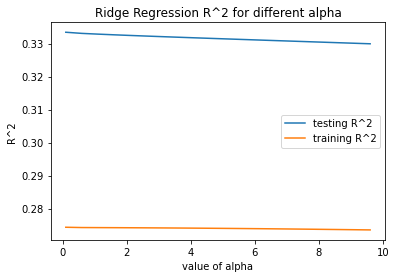

In [27]:
#plotting the R^2 values against alpha values
plt.plot(alpha_range, r2tests, label="testing R^2")
plt.plot(alpha_range, r2trains, label="training R^2")
plt.title("Ridge Regression R^2 for different alpha")
plt.xlabel("value of alpha")
plt.ylabel("R^2")
plt.legend();

In [17]:
from sklearn.linear_model import Lasso
alpha_range=np.arange(0.1, 1, 0.1)
r2trains = [] #to store R^2 values for different alpha
r2tests = [] #to store R^2 values for different alpha
no_features = [] #to store number of features used for different alpha
for a in alpha_range:
    model = Lasso(alpha = a, max_iter=100000)
    model.fit(X_train, Y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    r2train = model.score(X_train,Y_train)
    r2test = model.score(X_test,Y_test)
    no_feature=np.sum(model.coef_!=0)
    r2trains.append(r2train)
    r2tests.append(r2test)
    no_features.append(no_feature)
    print('Training R^2 value for alpha = ' , a , 'is:', r2train)
    print('Testing R^2 value for alpha = ' , a , 'is:', r2test)
    print("Number of features used for alpha =", a , 'is:', no_feature)

Training R^2 value for alpha =  0.1 is: 0.20358686555554106
Testing R^2 value for alpha =  0.1 is: 0.23261832341276112
Number of features used for alpha = 0.1 is: 4
Training R^2 value for alpha =  0.2 is: 0.16708127610670298
Testing R^2 value for alpha =  0.2 is: 0.18859121941987567
Number of features used for alpha = 0.2 is: 3
Training R^2 value for alpha =  0.30000000000000004 is: 0.11692532104735243
Testing R^2 value for alpha =  0.30000000000000004 is: 0.13109567853817983
Number of features used for alpha = 0.30000000000000004 is: 3
Training R^2 value for alpha =  0.4 is: 0.04672257239973232
Testing R^2 value for alpha =  0.4 is: 0.05396487199575517
Number of features used for alpha = 0.4 is: 3
Training R^2 value for alpha =  0.5 is: 0.01074472488487277
Testing R^2 value for alpha =  0.5 is: 0.014561857486178886
Number of features used for alpha = 0.5 is: 2
Training R^2 value for alpha =  0.6 is: 0.009264254701242258
Testing R^2 value for alpha =  0.6 is: 0.011976735772006086
Numbe

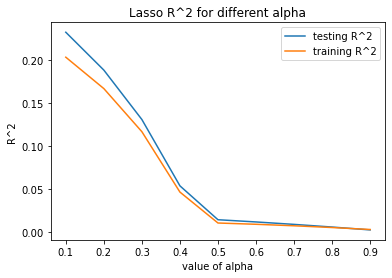

In [18]:
#plotting the R^2 values against alpha values
plt.plot(alpha_range, r2tests, label="testing R^2")
plt.plot(alpha_range, r2trains, label="training R^2")
plt.title("Lasso R^2 for different alpha")
plt.xlabel("value of alpha")
plt.ylabel("R^2")
plt.legend();